Best-fit Parameters:
Mass (M): 765.000 MeV
Width (Gamma): -467.735 MeV
Constant: 76.046 degrees

Parameter Uncertainties:
Mass (M) Uncertainty: 0.000 MeV
Width (Gamma) Uncertainty: 241.235 MeV
Constant Uncertainty: 7.796 degrees

Chi-Square Value: 26027.299

Pole Position of rho(770):
Real Part (Mass): 765.000 MeV
Imaginary Part (Width): -467.735 MeV


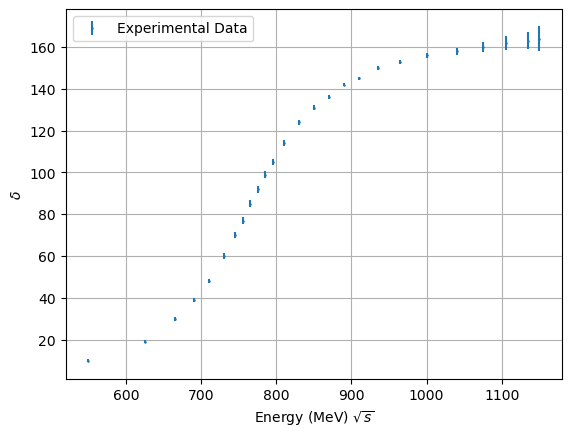

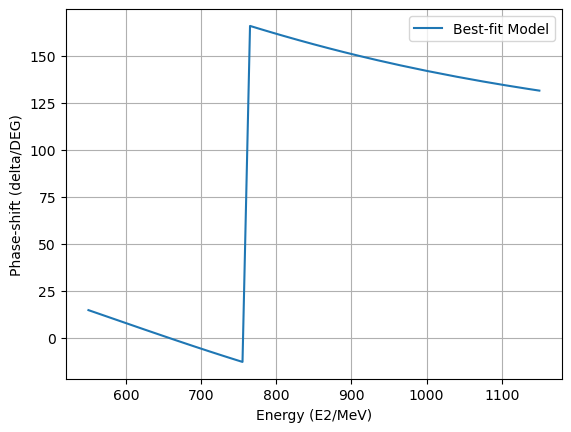

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the theoretical model (Breit-Wigner resonance formula)
def theoretical_model(E2, M, Gamma, constant):
    return np.degrees(np.arctan((2 * Gamma * E2) / (M**2 - E2**2)))+constant 

# Experimental dataset
E2_exp = np.array([550, 625, 665, 690, 710, 730, 745, 755, 765, 775, 785, 795,
                   810, 830, 850, 870, 890, 910, 935, 965, 1000, 1040, 1075, 1105, 1135, 1150])
delta_exp = np.array([10, 19, 30, 39, 48, 60, 70, 77, 85, 92, 99, 105, 114, 124, 131, 136, 142, 145, 150, 153, 156, 158, 160, 162, 163, 164])
Err_delta_exp = np.array([0.7, 0.8, 1, 1, 1, 1.5, 1.5, 1.6, 1.6, 1.6, 1.5, 1.5, 1.4, 1.2, 1.1, 1, 0.8, 0.8, 0.9, 1, 1.2, 1.6, 2.5, 3.4, 4, 6])

# Initial guess for the parameters
initial_guess = [770, 170, 180]

# Perform the curve fitting
fit_params, cov_matrix = curve_fit(theoretical_model, E2_exp, delta_exp, p0=initial_guess, sigma=Err_delta_exp)

# Extract the best-fit parameters and their uncertainties
M_fit, Gamma_fit, constant_fit = fit_params
M_err, Gamma_err, constant_err = np.sqrt(np.diag(cov_matrix))

# Calculate the theoretical phase-shift values using the best-fit parameters
theoretical_delta_fit = theoretical_model(E2_exp, M_fit, Gamma_fit, constant_fit)

# Calculate the Chi-Square value
chi_square = np.sum(((delta_exp - theoretical_delta_fit) / Err_delta_exp)**2)

# Output the results
print("Best-fit Parameters:")
print("Mass (M): {:.3f} MeV".format(M_fit))
print("Width (Gamma): {:.3f} MeV".format(Gamma_fit))
print("Constant: {:.3f} degrees".format(constant_fit))
print("\nParameter Uncertainties:")
print("Mass (M) Uncertainty: {:.3f} MeV".format(M_err))
print("Width (Gamma) Uncertainty: {:.3f} MeV".format(Gamma_err))
print("Constant Uncertainty: {:.3f} degrees".format(constant_err))
print("\nChi-Square Value: {:.3f}".format(chi_square))

# Calculate the pole position
pole_position = complex(M_fit, -Gamma_fit/2)

print("\nPole Position of rho(770):")
print("Real Part (Mass): {:.3f} MeV".format(pole_position.real))
print("Imaginary Part (Width): {:.3f} MeV".format(-2 * pole_position.imag))

# Plot the fitted model and experimental data
plt.errorbar(E2_exp, delta_exp, yerr=Err_delta_exp, fmt='o',markersize=0.8, label='Experimental Data')
plt.xlabel(r'Energy (MeV) $\sqrt{s}$')
plt.ylabel(r'$\delta$')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(E2_exp, theoretical_delta_fit, label='Best-fit Model')
plt.xlabel('Energy (E2/MeV)')
plt.ylabel('Phase-shift (delta/DEG)')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
def Chi2(parameters):
    M, Gamma, constant = parameters
    theoretical_delta = theoretical_model(E2_exp, M, Gamma, constant)
    chi_square = np.sum(((delta_exp - theoretical_delta) / Err_delta_exp)**2)
    return chi_square


In [3]:
from scipy.optimize import minimize

# Initial guess for the parameters
initial_guess = [770, 150, 0]

# Minimize Chi-Square to find the best-fit parameters
result = minimize(Chi2, initial_guess, method='L-BFGS-B')

# Extract the best-fit parameters
M_fit, Gamma_fit, constant_fit = result.x


In [4]:
# New set of energies for predictions
E2_predictions = np.linspace(500, 1200, 100)

# Calculate theoretical phase-shifts for predictions using the best-fit parameters
delta_predictions = theoretical_model(E2_predictions, M_fit, Gamma_fit, constant_fit)


In [5]:
# Calculate the pole position
pole_position = complex(M_fit, -Gamma_fit/2)

print("Pole Position of rho(770):")
print("Real Part (Mass): {:.3f} MeV".format(pole_position.real))
print("Imaginary Part (Width): {:.3f} MeV".format(-2 * pole_position.imag))


Pole Position of rho(770):
Real Part (Mass): 665.001 MeV
Imaginary Part (Width): -90.983 MeV


In [6]:
# Extract the uncertainties from the covariance matrix
M_err, Gamma_err, constant_err = np.sqrt(np.diag(result.hess_inv.todense()))

print("Parameter Uncertainties:")
print("Mass (M) Uncertainty: {:.3f} MeV".format(M_err))
print("Width (Gamma) Uncertainty: {:.3f} MeV".format(Gamma_err))
print("Constant Uncertainty: {:.3f} degrees".format(constant_err))


Parameter Uncertainties:
Mass (M) Uncertainty: 1.000 MeV
Width (Gamma) Uncertainty: 1.000 MeV
Constant Uncertainty: 1.000 degrees


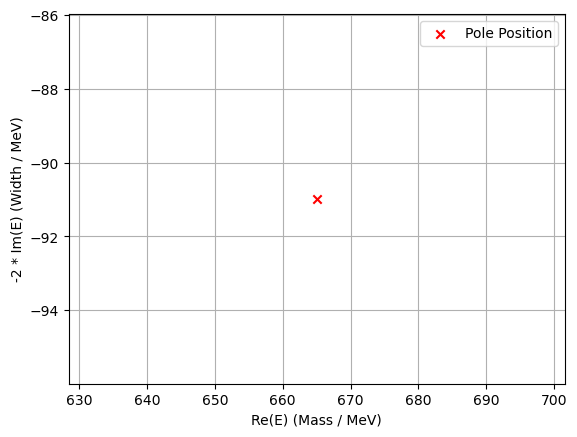

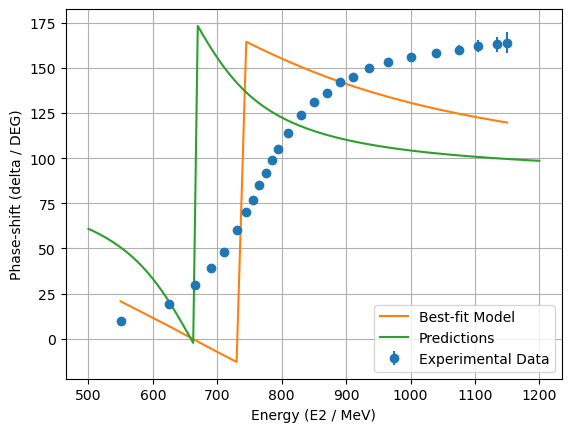

In [7]:
# Plot the pole position in the complex energy plane
plt.figure()
plt.scatter(pole_position.real, -2 * pole_position.imag, color='red', marker='x', label='Pole Position')
plt.xlabel('Re(E) (Mass / MeV)')
plt.ylabel('-2 * Im(E) (Width / MeV)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the experimental data, best-fit model, and predictions
plt.errorbar(E2_exp, delta_exp, yerr=Err_delta_exp, fmt='o', label='Experimental Data')
plt.plot(E2_exp, theoretical_delta_fit, label='Best-fit Model')
plt.plot(E2_predictions, delta_predictions, label='Predictions')
plt.xlabel('Energy (E2 / MeV)')
plt.ylabel('Phase-shift (delta / DEG)')
plt.legend()
plt.grid(True)
plt.show()


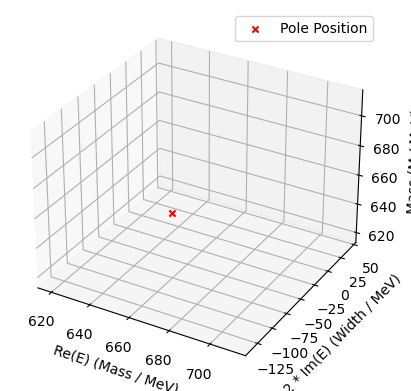

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the pole position in the 3D complex energy plane
ax.scatter(pole_position.real, -2 * pole_position.imag, M_fit, color='red', marker='x', label='Pole Position')

# Set axis labels
ax.set_xlabel('Re(E) (Mass / MeV)')
ax.set_ylabel('-2 * Im(E) (Width / MeV)')
ax.set_zlabel('Mass (M / MeV)')

# Set axis limits
ax.set_xlim([pole_position.real - 50, pole_position.real + 50])
ax.set_ylim([min(-2 * pole_position.imag, 0) - 50, max(-2 * pole_position.imag, 0) + 50])
ax.set_zlim([M_fit - 50, M_fit + 50])

# Show the 3D plot
plt.legend()
plt.show()
